In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from time import time
from scipy import optimize

import os

import ipywidgets
from ipywidgets import interact, interactive, fixed

In [2]:
simulations_filename = os.path.join('..', 'forward', 'simulations.dat')
data = pd.read_csv(simulations_filename, sep='\t')

In [3]:
data.head()

,M,Y,Z,alpha,overshoot,diffusion,age,X_c,mass_cc,mass_X,...,log_g,Teff,Fe/H,Dnu0,dnu02,r02,r01,dnu13,r13,r10
0,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.000000,0.763127,0.128390,0.763572,...,4.741384,5680.219262,-1.734798,248.486628,19.935655,0.080239,0.028559,31.994127,0.128941,0.028405
1,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.189305,0.752041,0.035468,0.762563,...,4.730413,5600.030380,-1.765215,243.983552,18.835262,0.077096,0.026408,30.483909,0.125000,0.026422
2,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.409710,0.738293,0.020204,0.761497,...,4.719444,5593.856492,-1.799203,239.461737,18.518358,0.077218,0.026394,30.020155,0.125408,0.026352
3,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.590183,0.726607,0.013547,0.760635,...,4.711685,5590.336659,-1.826263,236.310837,18.284559,0.077252,0.026288,29.695879,0.125693,0.026219
4,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.734055,0.716639,0.009122,0.759945,...,4.705936,5588.439028,-1.847405,233.986835,18.092299,0.077197,0.026191,29.426557,0.125779,0.026113


In [4]:
indices = np.ndarray.flatten(np.array([range(64) for i in range(int(len(data)/64))]))
data['index'] = indices
data.head()

,M,Y,Z,alpha,overshoot,diffusion,age,X_c,mass_cc,mass_X,...,Teff,Fe/H,Dnu0,dnu02,r02,r01,dnu13,r13,r10,index
0,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.000000,0.763127,0.128390,0.763572,...,5680.219262,-1.734798,248.486628,19.935655,0.080239,0.028559,31.994127,0.128941,0.028405,0
1,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.189305,0.752041,0.035468,0.762563,...,5600.030380,-1.765215,243.983552,18.835262,0.077096,0.026408,30.483909,0.125000,0.026422,1
2,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.409710,0.738293,0.020204,0.761497,...,5593.856492,-1.799203,239.461737,18.518358,0.077218,0.026394,30.020155,0.125408,0.026352,2
3,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.590183,0.726607,0.013547,0.760635,...,5590.336659,-1.826263,236.310837,18.284559,0.077252,0.026288,29.695879,0.125693,0.026219,3
4,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0.734055,0.716639,0.009122,0.759945,...,5588.439028,-1.847405,233.986835,18.092299,0.077197,0.026191,29.426557,0.125779,0.026113,4


In [5]:
X_names = ['M', 'Y', 'Z', 'alpha', 'overshoot', 'diffusion', 'index']
X = data.loc[:,X_names]
X.head()

,M,Y,Z,alpha,overshoot,diffusion,index
0,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,0
1,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,1
2,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,2
3,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,3
4,0.700137,0.236,0.000323,1.726654,0.002538,19.077329,4


In [6]:
y_names = ['age', 'X_c', 'radius', 'L', 'log_g', 'Teff', 'Fe/H', 'Dnu0', 'dnu02']
y = data.loc[:,y_names]
y.head()

,age,X_c,radius,L,log_g,Teff,Fe/H,Dnu0,dnu02
0,0.000000,0.763127,0.590223,0.325432,4.741384,5680.219262,-1.734798,248.486628,19.935655
1,0.189305,0.752041,0.597724,0.315305,4.730413,5600.030380,-1.765215,243.983552,18.835262
2,0.409710,0.738293,0.605321,0.321947,4.719444,5593.856492,-1.799203,239.461737,18.518358
3,0.590183,0.726607,0.610752,0.326926,4.711685,5590.336659,-1.826263,236.310837,18.284559
4,0.734055,0.716639,0.614809,0.330834,4.705936,5588.439028,-1.847405,233.986835,18.092299


In [142]:
forest = ExtraTreesRegressor(n_estimators=64, n_jobs=1, oob_score=True, bootstrap=True)
start = time()
forest.fit(X, y)
end = time()
print(forest.oob_score_, end-start)

0.989377533125 61.52656841278076


In [24]:
np.vstack((X.min(), X.max())).T

array([[  7.00137000e-01,   1.59969800e+00],
       [  2.20026000e-01,   3.39967000e-01],
       [  1.00000000e-05,   9.99160000e-02],
       [  1.50009200e+00,   2.49990800e+00],
       [  0.00000000e+00,   9.96353000e-01],
       [  0.00000000e+00,   9.88264160e+01],
       [  0.00000000e+00,   6.30000000e+01]])

In [146]:
inputs = [1, 0.2745, 0.02, 1.9139, 0.0518, 1, 29.3161]
res = forest.predict(np.array(inputs).reshape(1, -1))[0]
print(res[y_names.index('Teff')])
print(res[y_names.index('L')])
print(res[y_names.index('age')])
print(res[y_names.index('radius')])

5788.9440771
0.961141885466
4.52932771966
0.968792488932


In [141]:
def Teff_L_age(x):
    Y, Z, alpha_MLT, alpha_ov, index = x
    #Y, alpha_MLT = x
    inputs = [1, Y, Z, alpha_MLT, alpha_ov, 1, index]
    #inputs = [1, Y, 0.02, alpha_MLT, 0.05, 1, 29]
    res = forest.predict(np.array(inputs).reshape(1, -1))[0]
    return (res[y_names.index('Teff')] - 5777)**2 / 100 + \
           (res[y_names.index('L')] - 1)**2 + \
           (res[y_names.index('age')] - 4.57)**2/0.3 + \
           (res[y_names.index('radius')] - 1)**2

result = optimize.minimize(Teff_L_age, x0=[0.275, 0.02, 1.9, 0.05, 29], method='Nelder-Mead')

In [143]:
print(list(map(lambda x: "{0:.4f}".format(x), result.x)))

['0.2745', '0.0200', '1.9139', '0.0518', '29.3161']


In [144]:
def plot_HR(M, Y, Z, alpha_MLT, alpha_ov, diffusion): #, index):
    plt.ion()
    #x=('apples','oranges')
    Teff = []
    L = []
    for ii in range(63):
        res = forest.predict(np.array([M, Y, Z, alpha_MLT, alpha_ov, diffusion, ii]).reshape(1, -1))[0]
        Teff += [res[y_names.index('Teff')]]
        L += [res[y_names.index('L')]]
    
    plt.plot(Teff, L, 'k-')
    plt.gca().invert_xaxis()
    plt.text(5777, 1, r'$\odot$')
    plt.xlabel(r'Effective Temperature $T_{\mathrm{eff}}/K$')
    plt.ylabel(r'Luminosity $L/L_\odot$')
    return

def interactive():
    M_slider = ipywidgets.FloatSlider(min=0.7,   max=1.6,  step=0.01,   value=1)
    Y_slider = ipywidgets.FloatSlider(min=0.22,  max=0.34, step=0.001,  value=0.2745)
    Z_slider = ipywidgets.FloatSlider(min=10e-5, max=0.1,  step=0.0001, value=0.02)
    a_slider = ipywidgets.FloatSlider(min=1.5,   max=2.5,  step=0.01,   value=1.9139)
    o_slider = ipywidgets.FloatSlider(min=0,     max=0.1,  step=0.01,   value=0.0518)
    D_slider = ipywidgets.FloatSlider(min=0,     max=100,  step=0.1,    value=1)
    interact(plot_HR, M=M_slider, Y=Y_slider, Z=Z_slider, alpha_MLT=a_slider, alpha_ov=o_slider,
            diffusion=D_slider)#, index=i_slider)


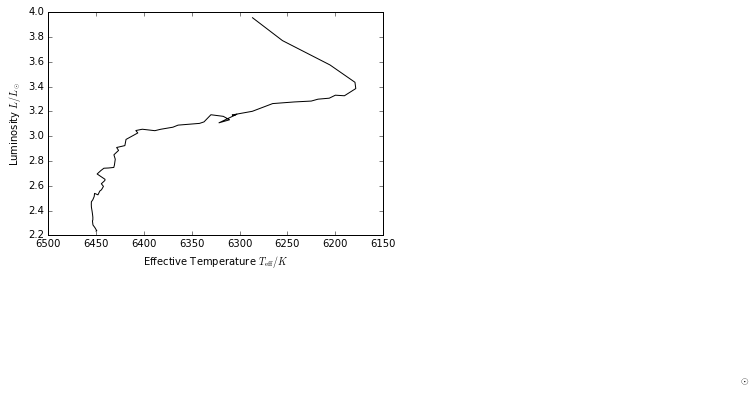

In [145]:
%matplotlib inline
interactive()